In [1]:
import torch
import deeplake
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

/usr/local/lib/python3.8/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.2.21) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


## Logging in to activeloop

In [2]:
!activeloop login -u username -p password
ds = deeplake.load(('hub://sinzlab/imagenet_and_responses_5M'))

/usr/local/lib/python3.8/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.2.21) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
Successfully logged in to Activeloop.
hub://sinzlab/imagenet_and_responses_5M loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/imagenet_and_responses_5M


In [3]:
ds.summary()

Dataset(path='hub://sinzlab/imagenet_and_responses_5M', tensors=['images', 'responses'])

  tensor     htype          shape          dtype  compression
  -------   -------        -------        -------  ------- 
  images     image   (6405830, 100, 100)   uint8    jpeg   
 responses  generic    (6405830, 1244)    float16   None   


### Get transforms that turn deeplake images into tensors

In [4]:

from tqdm import tqdm
tform = transforms.Compose([
    transforms.ToTensor(), # Must convert to pytorch tensor for subsequent operations to run
    transforms.Normalize([0.4876], [0.2756,]), # images are grayscale, mean and std are taken from our actual monkey data
])

## Get responses

In [5]:
# this will get the top 100_000 responses
# runtime ~ 1 minute

n_images = 100_000
resps = []
for i, sample in tqdm(enumerate(ds)):
    if i == 100_000:
        break
    resps.append(sample.responses.numpy())

100000it [01:18, 1281.56it/s]


In [6]:
resps = np.stack(resps)

In [7]:
resps.shape

(100000, 1244)

### Get images for the highest responses

In [8]:
neuron_index = 1123 # that's a nice eye neuron
n_top_images = 15

img_indices = np.argsort(resps[:, neuron_index])[-n_top_images:]

# this will again access the cloud dataloader to fetch the actual images
images = torch.stack([tform(ds.images[int(i)].numpy()) for i in img_indices])

## Show images

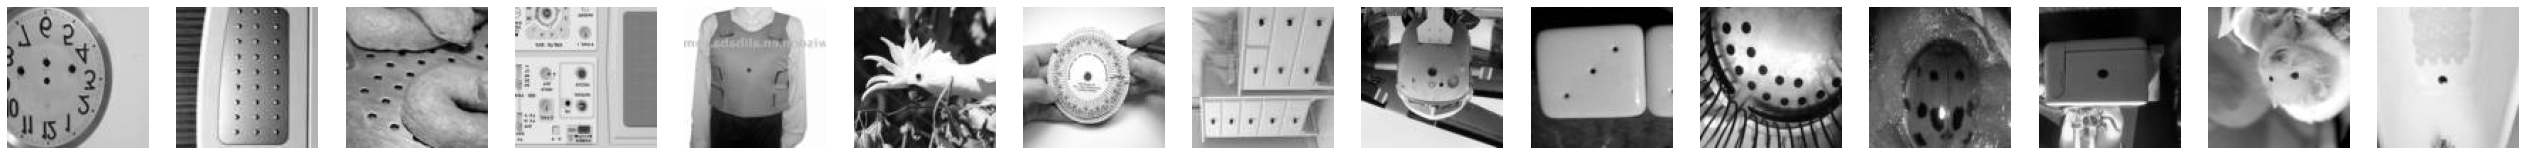

In [9]:
fig, axs = plt.subplots(1, n_top_images, figsize=(3*n_top_images, 3))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(images[i,0], cmap="gray")
    ax.axis("off")

# Get Images and Responses directly

In [10]:
example_responses, example_images = [], []
for i, sample in tqdm(enumerate(ds)):
    if i == 5:
        break
    example_responses.append(sample.responses.numpy())
    example_images.append(sample.images.numpy())

5it [00:03,  1.27it/s]


In [11]:
example_images = np.stack(example_images)

In [12]:
example_images.shape

(5, 100, 100)

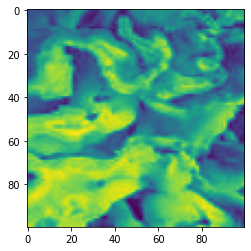

In [13]:
plt.imshow(example_images[0])

In [14]:
## corresponding responses:

In [15]:
print(example_responses[0])

[0.514  0.1864 0.196  ... 0.4038 0.1254 0.645 ]
